In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings
%matplotlib inline

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape , test.shape

((18288, 3), (5112, 2))

In [7]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [8]:
train.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [9]:
train["Datetime"] = pd.to_datetime(train["Datetime"])
test["Datetime"] = pd.to_datetime(test["Datetime"])
train_original["Datetime"] = pd.to_datetime(train_original["Datetime"])
test_original["Datetime"] = pd.to_datetime(test_original["Datetime"])

In [10]:
for i in (train,test,train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [11]:
train.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [12]:
train['day of week'] = train["Datetime"].dt.dayofweek
temp = train["Datetime"]

In [13]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [14]:
# lets assign 1 if the day of the week is weekend and 0 if it is a weekday
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek ==6:
        return 1
    else:
        return 0

In [15]:
temp2 = train["Datetime"].apply(applyer)
train["weekend"] = temp2

In [16]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


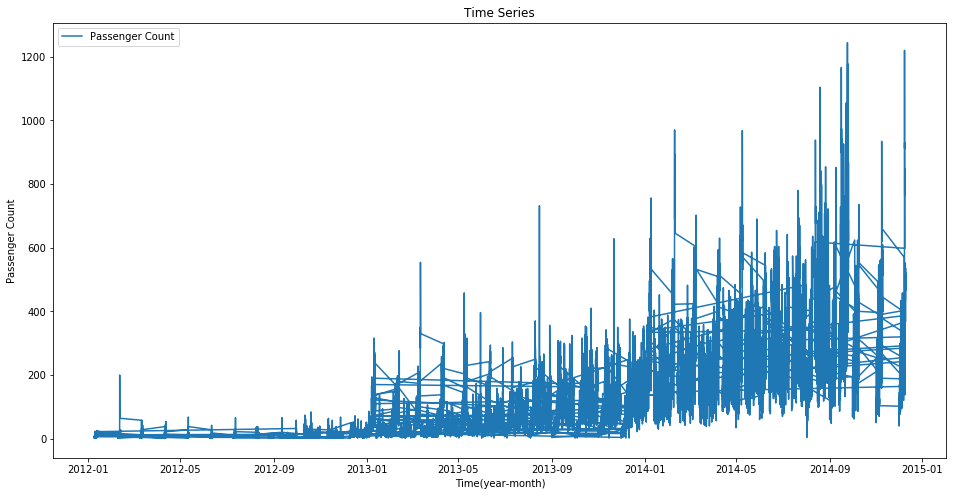

In [17]:
train.index = train["Datetime"]
df = train.drop("ID",1)
ts = df["Count"]
plt.figure(figsize=(16,8))
plt.plot(ts, label="Passenger Count")
plt.title("Time Series")
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc='best')

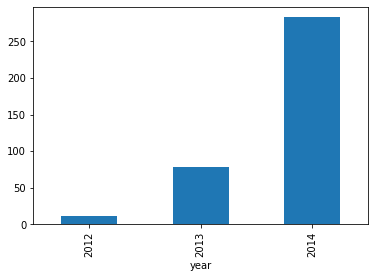

In [18]:
train.groupby('year')['Count'].mean().plot.bar()

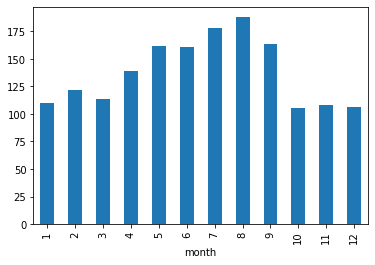

In [19]:
train.groupby('month')['Count'].mean().plot.bar()

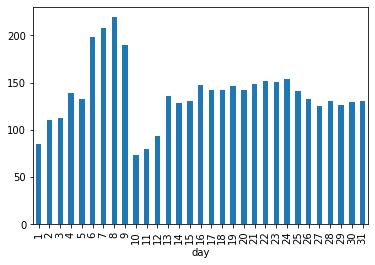

In [20]:
train.groupby('day')['Count'].mean().plot.bar()

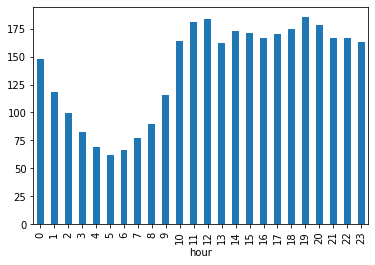

In [21]:
train.groupby('hour')['Count'].mean().plot.bar()

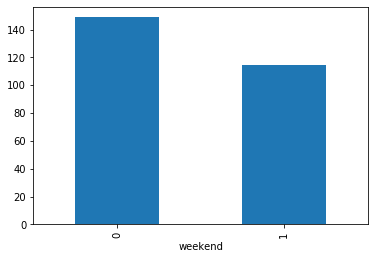

In [22]:
train.groupby('weekend')['Count'].mean().plot.bar()

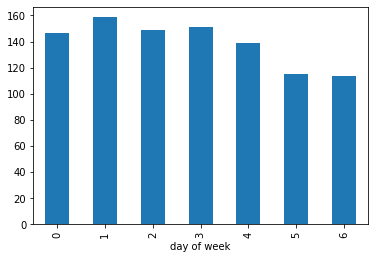

In [23]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [24]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [26]:
train = train.drop('ID',1)
train.head()

,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [43]:
hourly = train.resample('H').mean
daily = train.resample('D').mean
weekly = train.resample('W').mean
monthly = train.resample('M').mean
yearly = train.resample('Y').mean

In [36]:
train.resample('H').Count.mean().plot

In [42]:
hourly.Count.plot(figsize(15,8),title='Hourly',fontsize =14)

AttributeError: 'FramePlotMethods' object has no attribute 'Count'

AttributeError: 'FramePlotMethods' object has no attribute 'Count'

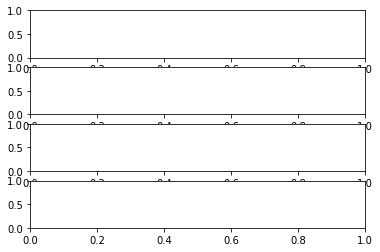

In [39]:
fig,axs = plt.subplots(4,1)
hourly.Count.plot(figsize(15,8),title='Hourly',fontsize =14, ax=axs[0])
daily.Count.plot(figsize(15,8),title='Daily',fontsize =14, ax=axs[1])
weekly.Count.plot(figsize(15,8),title='Weekly',fontsize =14, ax=axs[2])
monthly.Count.plot(figsize(15,8),title='Monthly',fontsize =14, ax=axs[3])

In [37]:
test.Timestamp = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H-%M')
test.index = test.Timestamp


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [38]:
test = test.resample('D').mean()